In [42]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal
import scipy.stats as sp 

### Traitement avant de répondre à la premiere question

In [17]:
# Chargement du DataSet
df = pd.read_excel("Business_Case.xlsx")

In [18]:
# Affichage des premieres lignes du Dataset
df.head()

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune


In [19]:
# Filtrer les lignes du DataFrame 'df' où la colonne 'open_at' est inférieure à 'acquired_at'
df_filtre = df[df['open_at'] < df['acquired_at']]

# Afficher les 5 premières lignes du DataFrame filtré pour vérifier le résultat
df_filtre.head()

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
3979,54f04667-290e-4039-a97f-226cebb98787,android,2020-02-05 15:50:56.272000,82fe2240-63b4-4421-8989-4c38bfacee31,DE,784,783,92,1,0.000065,9,0,0,0,2020-02-05 15:51:25.014000,android_new_users,ab-test_android,xxLow
33130,67c1e938-e7dc-43dc-9a76-affd3748d3c2,android,2020-02-05 15:48:03.700000,f3576d7a-8dde-4faa-8b67-0415458ba524,NL,788,783,225,1,0.009453,3,0,2,0,2020-02-05 15:48:25.844000,android_new_users,ab-test_android,xHigh
205315,0a5152fe-51bb-44d3-824f-6355525c2dcc,android,2020-02-12 23:07:31.330000,d1a1c608-14c4-4c43-8c3c-4d5a0cb6e8bc,US,785,783,0,1,0.000000,0,0,1,1,2020-02-12 23:07:31.399000,android_new_users,ab-test_android,xLow


In [20]:
# Créer un nouveau dataset où 'open_at' est supérieur ou égal à 'acquired_at'
new_df = df[df['open_at'] >= df['acquired_at']].copy()

# Afficher les 10 premières lignes du nouveau dataset
new_df.head()

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune


In [21]:
# Informations générales sur le dataset
print("\nInformations sur le dataset :")
new_df.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
Index: 372831 entries, 0 to 372833
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   session_id          372831 non-null  object 
 1   platform            372831 non-null  object 
 2   open_at             372831 non-null  object 
 3   user_id             372831 non-null  object 
 4   country             372829 non-null  object 
 5   ab_cohort_id        372831 non-null  int64  
 6   segment_id          372831 non-null  int64  
 7   session_length      372831 non-null  int64  
 8   session_number_     372831 non-null  int64  
 9   publisher_revenue   372831 non-null  float64
 10  fs_shown            372831 non-null  int64  
 11  rv_shown            372831 non-null  int64  
 12  game_count          372831 non-null  int64  
 13  offline_game_count  372831 non-null  int64  
 14  acquired_at         372831 non-null  object 
 15  segment_

In [22]:
# Convertir les colonnes de dates en format datetime
new_df['open_at'] = pd.to_datetime(new_df['open_at'])
new_df['acquired_at'] = pd.to_datetime(new_df['acquired_at'])

# Vérification des types de données après transformation
print("\nTypes de données après transformation des dates :")
print(new_df.info())


Types de données après transformation des dates :
<class 'pandas.core.frame.DataFrame'>
Index: 372831 entries, 0 to 372833
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   session_id          372831 non-null  object        
 1   platform            372831 non-null  object        
 2   open_at             372831 non-null  datetime64[ns]
 3   user_id             372831 non-null  object        
 4   country             372829 non-null  object        
 5   ab_cohort_id        372831 non-null  int64         
 6   segment_id          372831 non-null  int64         
 7   session_length      372831 non-null  int64         
 8   session_number_     372831 non-null  int64         
 9   publisher_revenue   372831 non-null  float64       
 10  fs_shown            372831 non-null  int64         
 11  rv_shown            372831 non-null  int64         
 12  game_count          372831 non-null  int

In [23]:
# Vérifier le nombre de valeurs manquantes pour chaque colonne
print("Valeurs manquantes par colonne :")
print(new_df.isnull().sum())

Valeurs manquantes par colonne :
session_id            0
platform              0
open_at               0
user_id               0
country               2
ab_cohort_id          0
segment_id            0
session_length        0
session_number_       0
publisher_revenue     0
fs_shown              0
rv_shown              0
game_count            0
offline_game_count    0
acquired_at           0
segment_name          0
ab_name               0
ab_cohort_name        0
dtype: int64


In [24]:
# Remplacer les valeurs manquantes dans 'country' par 'Unknown'
new_df['country'] = new_df['country'].fillna('Unknown')

# Vérification des valeurs manquantes après traitement
print("Valeurs manquantes après traitement :")
print(new_df.isnull().sum())

Valeurs manquantes après traitement :
session_id            0
platform              0
open_at               0
user_id               0
country               0
ab_cohort_id          0
segment_id            0
session_length        0
session_number_       0
publisher_revenue     0
fs_shown              0
rv_shown              0
game_count            0
offline_game_count    0
acquired_at           0
segment_name          0
ab_name               0
ab_cohort_name        0
dtype: int64


In [25]:
# Répartition des cohortes de test A/B
cohort_counts = new_df['ab_cohort_name'].value_counts()
print("\nRépartition des cohortes de test A/B :")
print(cohort_counts)


Répartition des cohortes de test A/B :
ab_cohort_name
control     62952
xxLow       62838
xLow        62516
xHigh       62102
gameTune    61238
xxHigh      61185
Name: count, dtype: int64


In [26]:
# Afficher les statistiques de base
statistiques = new_df.describe() 

# Afficher les statistiques
print(statistiques)

                             open_at   ab_cohort_id     segment_id  \
count                         372831  372831.000000  372831.000000   
mean   2020-02-12 03:00:04.961700096     790.118872     785.972317   
min       2020-02-04 16:06:57.343000     727.000000     722.000000   
25%    2020-02-09 05:53:05.226000128     787.000000     783.000000   
50%    2020-02-12 05:11:43.876999936     789.000000     783.000000   
75%    2020-02-15 04:39:07.122999808     794.000000     792.000000   
max       2020-02-17 07:59:58.638000     799.000000     792.000000   
std                              NaN       4.728461       4.234110   

       session_length  session_number_  publisher_revenue       fs_shown  \
count   372831.000000    372831.000000      372831.000000  372831.000000   
mean       343.129134         4.733678           0.037661       3.962396   
min          0.000000         0.000000           0.000000       0.000000   
25%         73.000000         1.000000           0.001895       1

# **1.   Décrivez brièvement la donnée et le context du test A/B**

L'entreprise de développement de jeu mobile a mis en place une expérience A/B testing dans le but de trouver la fréquence d'affichage la plus prolifique en terme de revenu et de rétention d'utilisateurs. Le test A/B vise à identifier la fréquence optimale d'affichage de publicités parmi plusieurs groupes (xxLow, xxHigh, etc.), en analysant l'effet de ces publicités sur des variables clés comme la durée des sessions, les revenus générés et l'expérience globale des utilisateurs.

Les publicités affichées dans le jeu sont de deux types :

FS (Full Screen ads) : Publicités affichées entre les niveaux ou les parties du jeu. Elles sont souvent perçues comme plus intrusives, étant "obligatoire" à regarder. RV (Rewarded Video ads) : Publicités regardées volontairement par les joueurs pour obtenir une récompense en jeu. Ces publicités sont généralement mieux acceptées, car elles offrent une contrepartie.

Types de Données : Le dataset contient des informations sur des sessions de jeu pour des utilisateurs répartis en différentes cohortes. Les variables suivantes sont importantes pour cette analyse :

**session_id**: Identifiant unique de la session.
**platform** : Plateforme de l'utilisateur (Android, iOS).
**open_at** : Horodatage de la session.
**user_id ** : Identifiant de l'utilisateur.
**country**: Pays d'origine de l'utilisateur.
**session_length** : Durée de la session (en secondes).
**publisher_revenue** : Revenus générés par les publicités lors de la session. **fs_shown** : Nombre de publicités plein écran (FS) affichées durant la session.
**rv_shown** : Nombre de publicités récompensées visionnées par les utilisateurs durant la session.
**ab_cohort_name** : Nom de la cohorte A/B(xxLow, xxHigh, etc.) à laquelle la session est assignée.

Le test cherche à équilibrer la monétisation (revenus générés) et l'engagement utilisateur (via la durée des sessions) tout en prenant en compte l'impact des différents formats de publicité.

# **2. Quelle serait une métrique importante à observer sur ce jeu de données ?**

## Étape 1 : Identification des Métriques Clés

Les deux principales dimensions à analyser dans ce jeu de données sont :

### Durée de session (session_length).
### Revenu par session (publisher_revenue).
### Nombre de sessions par utilisateur (session_number_).

Ces trois métriques sont cruciales, car elles reflètent directement l'engagement de l'utilisateur et la performance financière de la plateforme.

En plus de ces trois métriques, d'autres variables peuvent jouer un rôle important dans leur variation :

### fs_shown : Nombre de publicités plein écran affichées.
### rv_shown : Nombre de vidéos récompensées affichées.

Ces dernières sont des variables d'action qui pourraient avoir un impact direct sur le revenu et la durée des sessions.

# Identification et traitement des valeurs aberrantes :


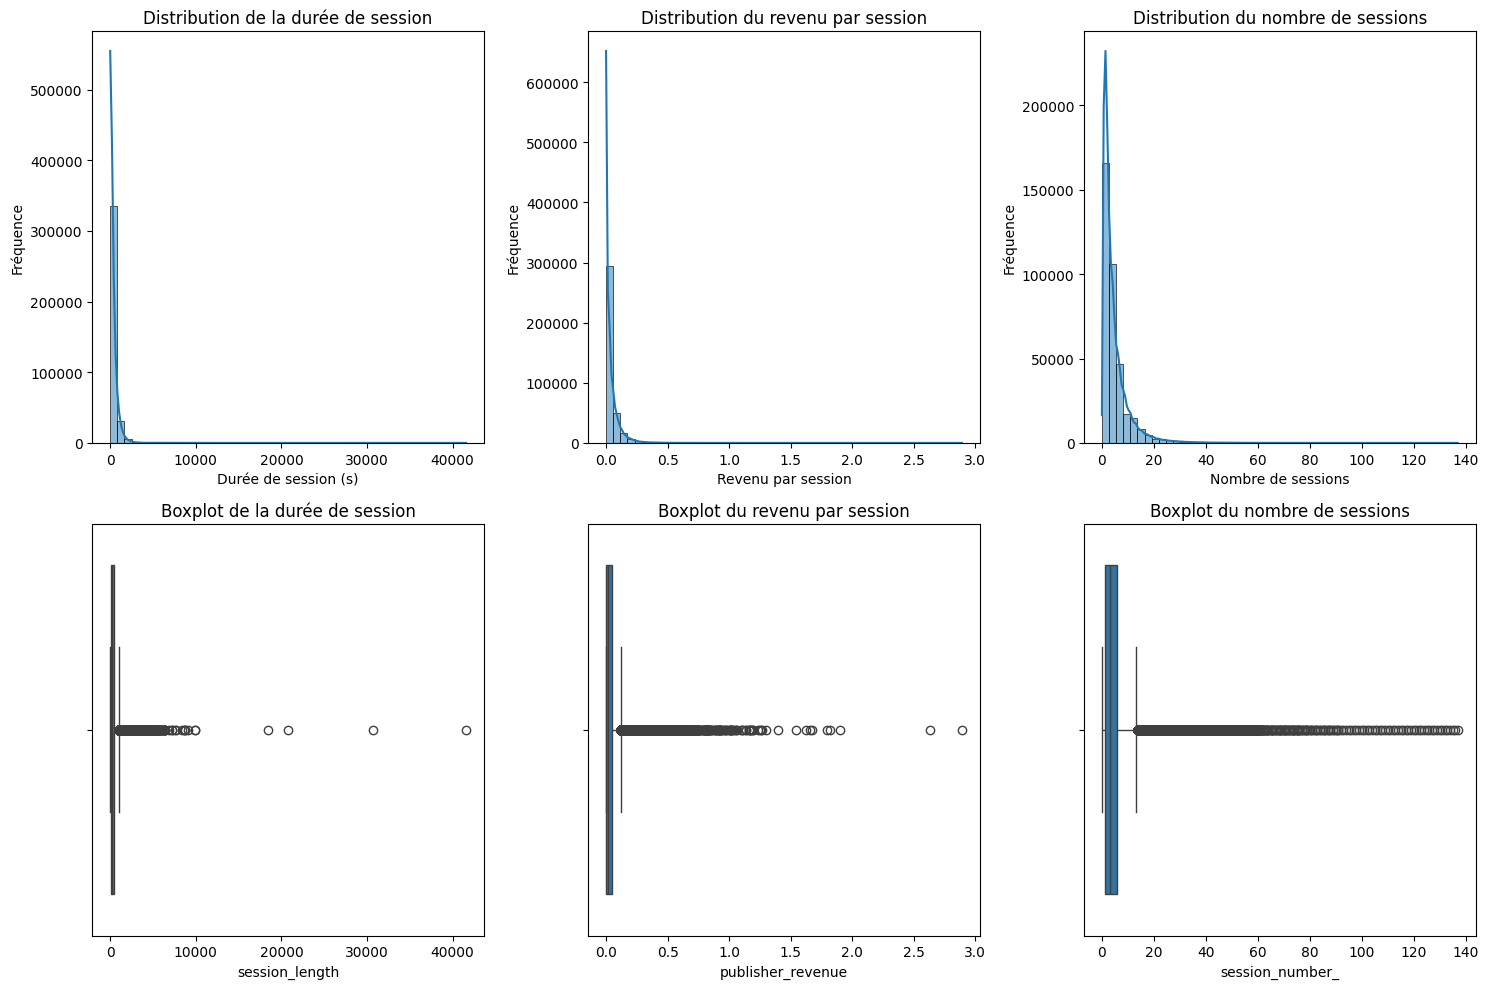

In [27]:
# Taille de la figure
plt.figure(figsize=(15, 10))

# Histogramme de la durée de session
plt.subplot(2, 3, 1)
sns.histplot(new_df['session_length'], bins=50, kde=True)
plt.title('Distribution de la durée de session')
plt.xlabel('Durée de session (s)')
plt.ylabel('Fréquence')

# Boxplot de la durée de session
plt.subplot(2, 3, 4)
sns.boxplot(x=new_df['session_length'])
plt.title('Boxplot de la durée de session')

# Histogramme du revenu par session
plt.subplot(2, 3, 2)
sns.histplot(new_df['publisher_revenue'], bins=50, kde=True)
plt.title('Distribution du revenu par session')
plt.xlabel('Revenu par session')
plt.ylabel('Fréquence')

# Boxplot du revenu par session
plt.subplot(2, 3, 5)
sns.boxplot(x=new_df['publisher_revenue'])
plt.title('Boxplot du revenu par session')

# Histogramme du nombre de sessions
plt.subplot(2, 3, 3)
sns.histplot(new_df['session_number_'], bins=50, kde=True)
plt.title('Distribution du nombre de sessions')
plt.xlabel('Nombre de sessions')
plt.ylabel('Fréquence')

# Boxplot du nombre de sessions
plt.subplot(2, 3, 6)
sns.boxplot(x=new_df['session_number_'])
plt.title('Boxplot du nombre de sessions')

plt.tight_layout()
plt.show()


In [28]:
# Filtrer les valeurs aberrantes de la durée de session
filtered_df = new_df[(new_df['session_length'] >= 10) & (new_df['session_length'] <= 10000)]

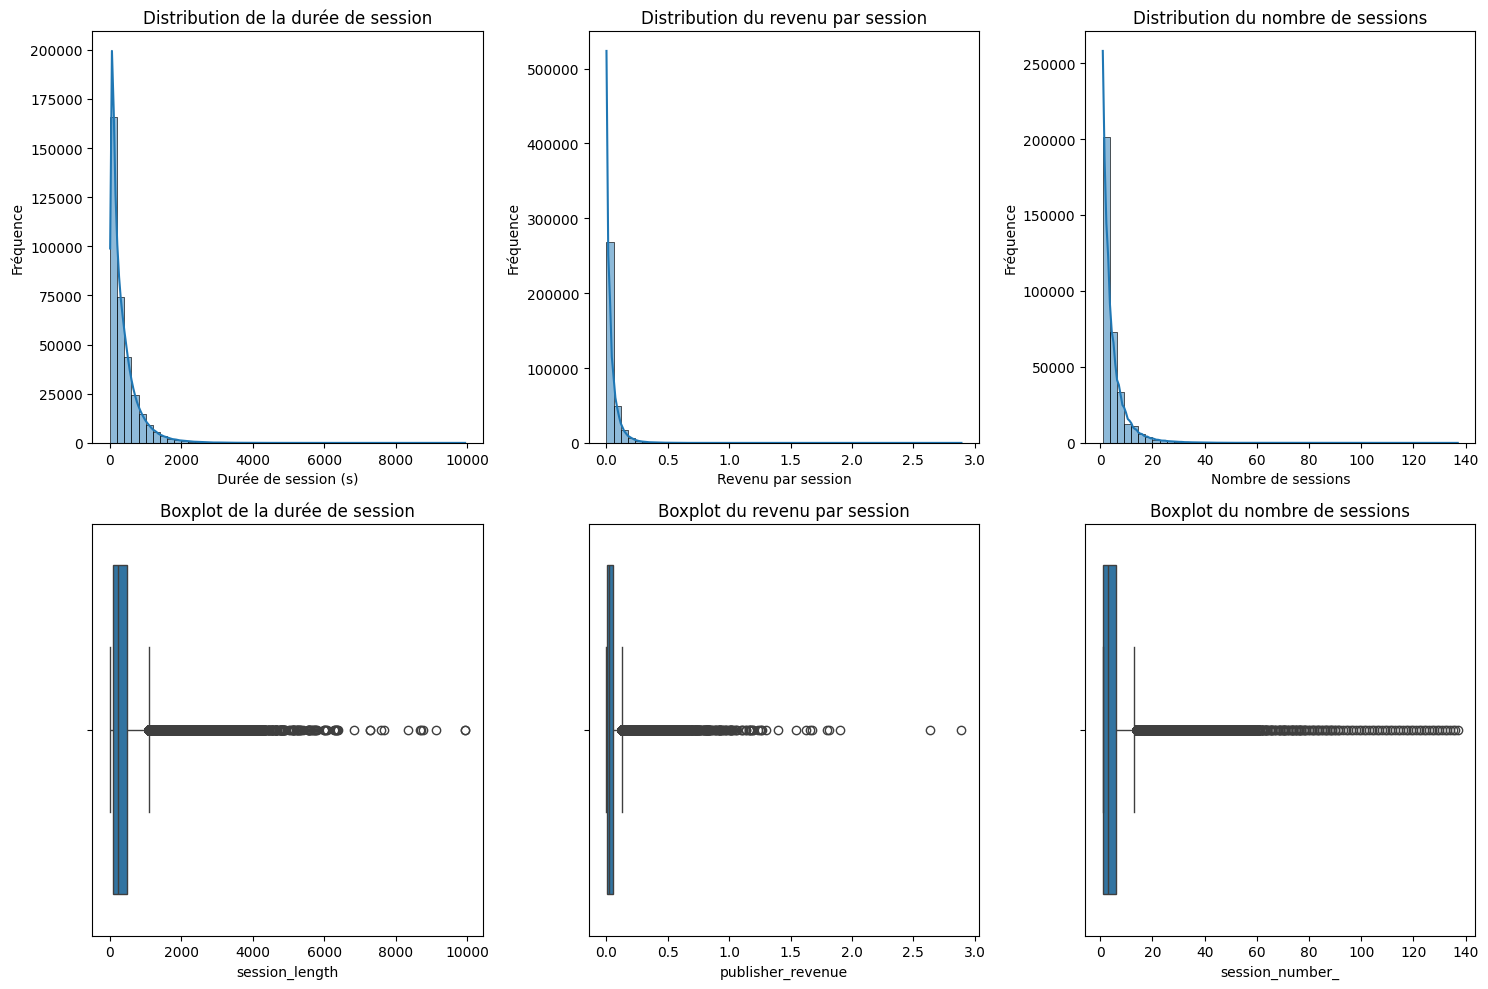

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de la figure
plt.figure(figsize=(15, 10))

# Histogramme de la durée de session
plt.subplot(2, 3, 1)
sns.histplot(filtered_df['session_length'], bins=50, kde=True)
plt.title('Distribution de la durée de session')
plt.xlabel('Durée de session (s)')
plt.ylabel('Fréquence')

# Boxplot de la durée de session
plt.subplot(2, 3, 4)
sns.boxplot(x=filtered_df['session_length'])
plt.title('Boxplot de la durée de session')

# Histogramme du revenu par session
plt.subplot(2, 3, 2)
sns.histplot(filtered_df['publisher_revenue'], bins=50, kde=True)
plt.title('Distribution du revenu par session')
plt.xlabel('Revenu par session')
plt.ylabel('Fréquence')

# Boxplot du revenu par session
plt.subplot(2, 3, 5)
sns.boxplot(x=filtered_df['publisher_revenue'])
plt.title('Boxplot du revenu par session')

# Histogramme du nombre de sessions
plt.subplot(2, 3, 3)
sns.histplot(filtered_df['session_number_'], bins=50, kde=True)
plt.title('Distribution du nombre de sessions')
plt.xlabel('Nombre de sessions')
plt.ylabel('Fréquence')

# Boxplot du nombre de sessions
plt.subplot(2, 3, 6)
sns.boxplot(x=filtered_df['session_number_'])
plt.title('Boxplot du nombre de sessions')

plt.tight_layout()
plt.show()

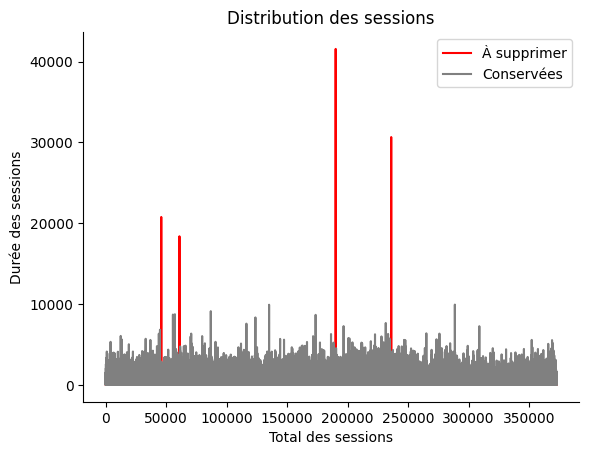

In [30]:

# Récupérer les valeurs de session
session_lengths = new_df['session_length'].values

# Créer des masques pour les valeurs
mask_red = (session_lengths < 10) | (session_lengths > 10000)
mask_gray = ~mask_red

# Tracer les valeurs rouges
plt.plot(np.arange(len(session_lengths))[mask_red], session_lengths[mask_red], color='red', label='À supprimer')

# Tracer les valeurs grises
plt.plot(np.arange(len(session_lengths))[mask_gray], session_lengths[mask_gray], color='gray', label='Conservées')

# Rendre les axes supérieurs et droits invisibles
plt.gca().spines[['top', 'right']].set_visible(False)

# Ajouter des titres aux axes
plt.xlabel("Total des sessions")
plt.ylabel("Durée des sessions")
plt.title("Distribution des sessions")
plt.legend()

# Afficher le graphique
plt.show()

# A screen et mettre dans la présentation, le graphique sert à voir les valeures de session_length qu'on ne garde pas (<10 et >10 000)

# Analyse statistique des métriques

In [31]:
# 1. Analyse de la durée moyenne de session par cohorte
print("Analyse de la durée moyenne de session par cohorte :")
session_length_groups = [new_df[new_df['ab_cohort_name'] == cohort]['session_length']
                         for cohort in new_df['ab_cohort_name'].unique()]

# Test de Kruskal-Wallis pour la durée des sessions
kruskal_stat_length, kruskal_p_length = sp.kruskal(*session_length_groups)
print(f"\nTest de Kruskal-Wallis - Durée de session :")
print(f"Statistique : {kruskal_stat_length}, p-value : {kruskal_p_length}")

if kruskal_p_length < 0.05:
    print("Il existe des différences significatives entre les cohortes pour la durée des sessions.")
else:
    print("Aucune différence significative détectée entre les cohortes pour la durée des sessions.")

# 2. Analyse du nombre moyen de sessions par utilisateur par cohorte
print("\nAnalyse du nombre moyen de sessions par utilisateur par cohorte :")
session_number_groups = [new_df[new_df['ab_cohort_name'] == cohort]['session_number_']
                         for cohort in new_df['ab_cohort_name'].unique()]

# Test de Kruskal-Wallis pour le nombre de sessions
kruskal_stat_number, kruskal_p_number = sp.kruskal(*session_number_groups)
print(f"\nTest de Kruskal-Wallis - Nombre de sessions :")
print(f"Statistique : {kruskal_stat_number}, p-value : {kruskal_p_number}")

if kruskal_p_number < 0.05:
    print("Il existe des différences significatives entre les cohortes pour le nombre de sessions.")
else:
    print("Aucune différence significative détectée entre les cohortes pour le nombre de sessions.")

# 3. Analyse du revenu par type de publicité
print("\nAnalyse du revenu par type de publicité par cohorte :")
# On suppose que `fs_shown` et `rv_shown` définissent les types de publicités
revenue_groups = [
    new_df[new_df['ab_cohort_name'] == cohort]['publisher_revenue']
    for cohort in new_df['ab_cohort_name'].unique()
]

# Test de Kruskal-Wallis pour le revenu par publicité
kruskal_stat_revenue, kruskal_p_revenue = sp.kruskal(*revenue_groups)
print(f"\nTest de Kruskal-Wallis - Revenu par type de publicité :")
print(f"Statistique : {kruskal_stat_revenue}, p-value : {kruskal_p_revenue}")

if kruskal_p_revenue < 0.05:
    print("Il existe des différences significatives entre les cohortes pour le revenu par type de publicité.")
else:
    print("Aucune différence significative détectée entre les cohortes pour le revenu par type de publicité.")


Analyse de la durée moyenne de session par cohorte :

Test de Kruskal-Wallis - Durée de session :
Statistique : 217.31478608438337, p-value : 5.58634769061666e-45
Il existe des différences significatives entre les cohortes pour la durée des sessions.

Analyse du nombre moyen de sessions par utilisateur par cohorte :

Test de Kruskal-Wallis - Nombre de sessions :
Statistique : 75.35847839063106, p-value : 7.83074289180871e-15
Il existe des différences significatives entre les cohortes pour le nombre de sessions.

Analyse du revenu par type de publicité par cohorte :

Test de Kruskal-Wallis - Revenu par type de publicité :
Statistique : 461.75296443120425, p-value : 1.43175811106237e-97
Il existe des différences significatives entre les cohortes pour le revenu par type de publicité.


Revenu moyen par session (données filtrées) : ab_cohort_name
control     0.037964
gameTune    0.039457
xHigh       0.040211
xLow        0.034449
xxHigh      0.040825
xxLow       0.033201
Name: publisher_revenue, dtype: float64
Durée moyenne des sessions (données filtrées) : ab_cohort_name
control     341.721947
gameTune    336.360462
xHigh       338.805916
xLow        352.719864
xxHigh      333.278026
xxLow       355.458162
Name: session_length, dtype: float64
Nombre moyen de sessions par utilisateur (données filtrées) : ab_cohort_name
control     4.978094
gameTune    4.593422
xHigh       4.691974
xLow        4.769147
xxHigh      4.704977
xxLow       4.659378
Name: session_number_, dtype: float64


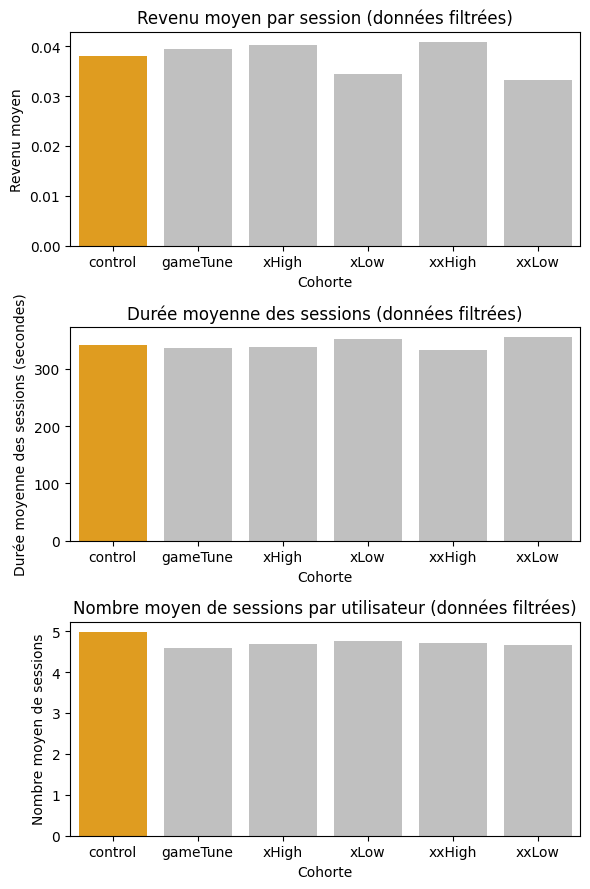

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as sp

# Configuration de la taille de la figure
fig, axs = plt.subplots(3, 1, figsize=(6, 9))

# Créer une palette dynamique pour toutes les cohortes
cohortes = new_df['ab_cohort_name'].unique()
palette_dict = {cohort: ('orange' if cohort == 'control' else 'silver') for cohort in cohortes}

# 1. Revenu moyen par session (données filtrées)
average_revenue_per_cohort_filtered = new_df.groupby('ab_cohort_name')['publisher_revenue'].mean()
print("Revenu moyen par session (données filtrées) :", average_revenue_per_cohort_filtered)
sns.barplot(x=average_revenue_per_cohort_filtered.index,
            y=average_revenue_per_cohort_filtered.values,
            hue=average_revenue_per_cohort_filtered.index,
            palette=palette_dict,
            dodge=False,
            ax=axs[0])
axs[0].set_title('Revenu moyen par session (données filtrées)')
axs[0].set_xlabel('Cohorte')
axs[0].set_ylabel('Revenu moyen')
# Supprimer la légende uniquement si elle existe
if axs[0].get_legend() is not None:
    axs[0].get_legend().remove()

# 2. Durée moyenne des sessions (données filtrées)
average_session_length_per_cohort_filtered = new_df.groupby('ab_cohort_name')['session_length'].mean()
print("Durée moyenne des sessions (données filtrées) :", average_session_length_per_cohort_filtered)
sns.barplot(x=average_session_length_per_cohort_filtered.index,
            y=average_session_length_per_cohort_filtered.values,
            hue=average_session_length_per_cohort_filtered.index,
            palette=palette_dict,
            dodge=False,
            ax=axs[1])
axs[1].set_title('Durée moyenne des sessions (données filtrées)')
axs[1].set_xlabel('Cohorte')
axs[1].set_ylabel('Durée moyenne des sessions (secondes)')
if axs[1].get_legend() is not None:
    axs[1].get_legend().remove()

# 3. Nombre moyen de sessions par utilisateur (données filtrées)
average_sessions_per_user_filtered = new_df.groupby('ab_cohort_name')['session_number_'].mean()
print("Nombre moyen de sessions par utilisateur (données filtrées) :", average_sessions_per_user_filtered)
sns.barplot(x=average_sessions_per_user_filtered.index,
            y=average_sessions_per_user_filtered.values,
            hue=average_sessions_per_user_filtered.index,
            palette=palette_dict,
            dodge=False,
            ax=axs[2])
axs[2].set_title('Nombre moyen de sessions par utilisateur (données filtrées)')
axs[2].set_xlabel('Cohorte')
axs[2].set_ylabel('Nombre moyen de sessions')
if axs[2].get_legend() is not None:
    axs[2].get_legend().remove()

plt.tight_layout()
plt.show()

# 3- est-ce qu'il existe une fréquence optimale ?

1.   Les High proposent + de pubs Full Screen que les autres, à haute fréquence. Cela génère plus d'argent mais les users se lassent plus vite. Les sessions sont moins longues que pour les autres fréquences, les joueurs reviennet moins jouer et jouent à moins de jeu différents. Ces tactiques sont considérées comme assez agrressives. En plus, les joueurs regardent moins de RV (publicité à récompense)

2.   Les Low imposent beaucoup moins de Full Screen, encourageant les joueurs à rester mais les revenus générés sont beaucoup plus faibles. Les joueurs regardent + de RV que les High mais cela ne compense pas du tout la différence avec les FS étant de 400€ entre xxHigh et xxLow, contre un léger 38€ de différence avec les RV.

On a créé un ratio selon les critères importants comme le compte total de joueurs distincts, le revenu généré, le nombre de jeu joué, le nombre de session cumulée par les joueurs, le nombre de pub obligatoire et le nombre de déconnection. Le ratio ressemble à ça :    
    (TotalJoueurs + TotalRevenue + TotalGameCount + TotalSessions)/
    (TotalAds + TotalOffline).
En se fiant ce ratio, on observe que xxLow est premier et xLow est second, tandis que les xHigh et xxHigh sont derniers. Control arrive en 3ème et gameTune 4ème.

### Exploration Visuelle des Relations entre FS, RV, Revenu et Durée de Session

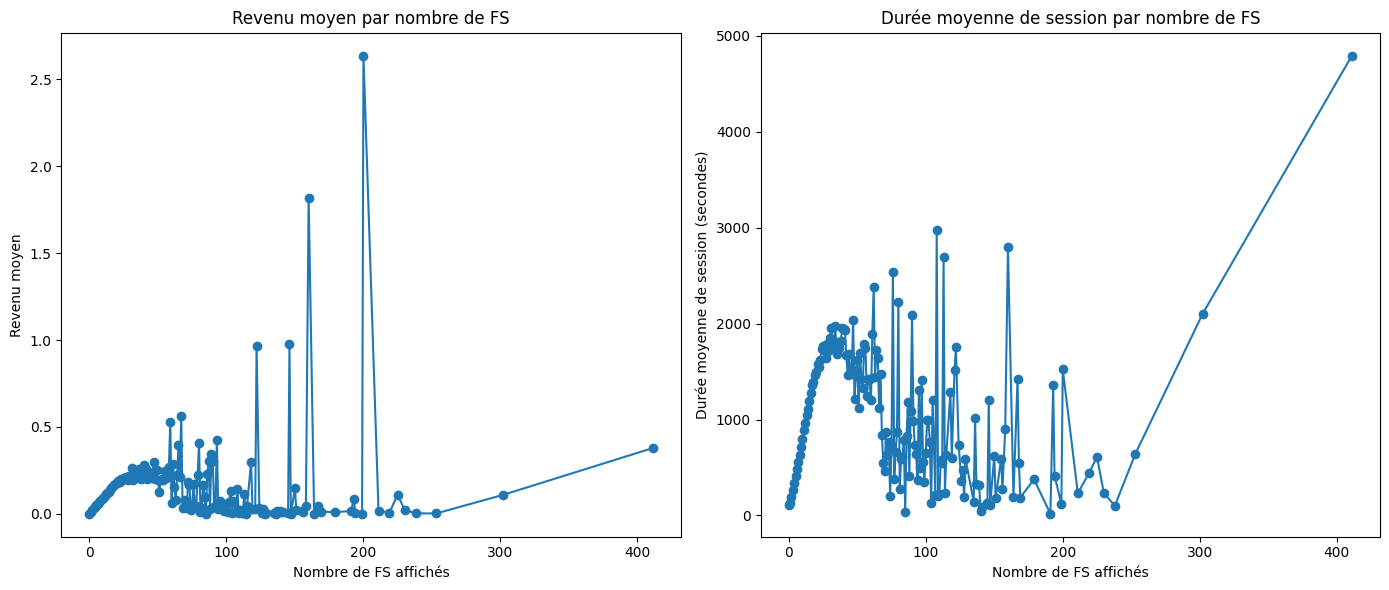

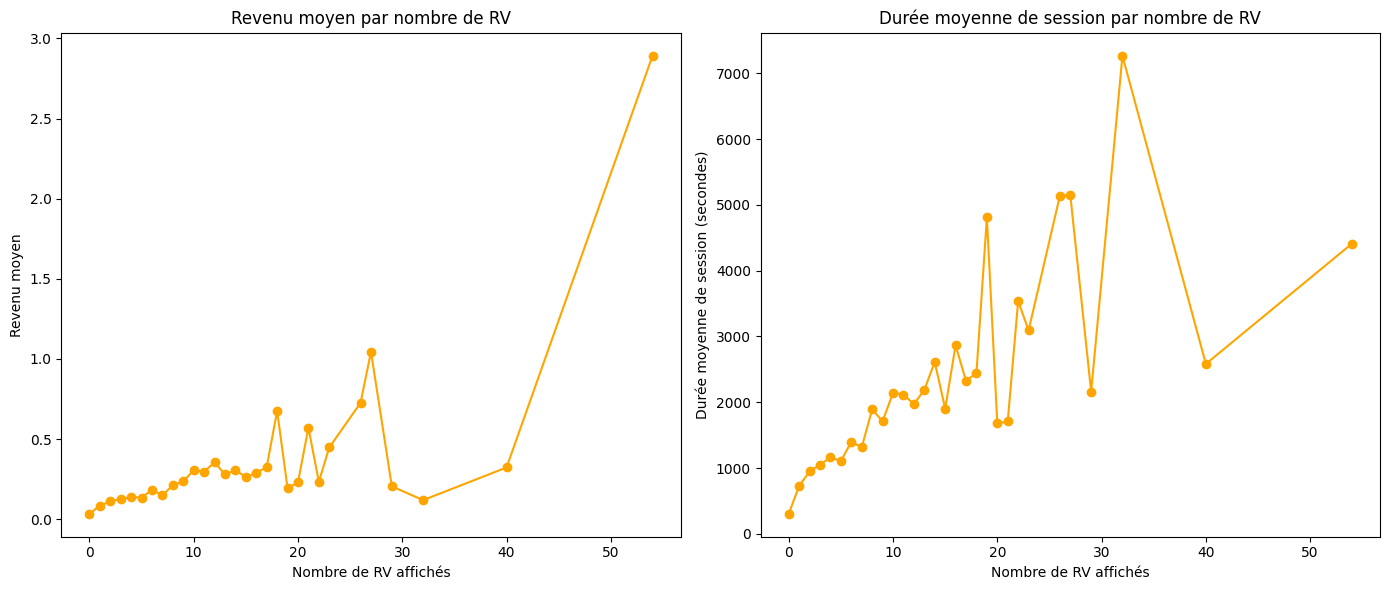

In [33]:
# Calcul des moyennes de revenu et de durée de session par nombre de FS et RV
fs_stats = new_df.groupby('fs_shown').agg({'publisher_revenue': 'mean', 'session_length': 'mean'}).reset_index()
rv_stats = new_df.groupby('rv_shown').agg({'publisher_revenue': 'mean', 'session_length': 'mean'}).reset_index()

# Visualisation des moyennes de revenu et de durée de session par FS
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fs_stats['fs_shown'], fs_stats['publisher_revenue'], marker='o')
plt.title('Revenu moyen par nombre de FS')
plt.xlabel('Nombre de FS affichés')
plt.ylabel('Revenu moyen')

plt.subplot(1, 2, 2)
plt.plot(fs_stats['fs_shown'], fs_stats['session_length'], marker='o')
plt.title('Durée moyenne de session par nombre de FS')
plt.xlabel('Nombre de FS affichés')
plt.ylabel('Durée moyenne de session (secondes)')

plt.tight_layout()
plt.show()

# Visualisation des moyennes de revenu et de durée de session par RV
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(rv_stats['rv_shown'], rv_stats['publisher_revenue'], marker='o', color='orange')
plt.title('Revenu moyen par nombre de RV')
plt.xlabel('Nombre de RV affichés')
plt.ylabel('Revenu moyen')

plt.subplot(1, 2, 2)
plt.plot(rv_stats['rv_shown'], rv_stats['session_length'], marker='o', color='orange')
plt.title('Durée moyenne de session par nombre de RV')
plt.xlabel('Nombre de RV affichés')
plt.ylabel('Durée moyenne de session (secondes)')

plt.tight_layout()
plt.show()

### Interprétation

Revenu moyen par FS : Le graphique montre une augmentation initiale du revenu moyen à mesure que le nombre de FS augmente, mais cette relation se stabilise et devient plus volatile avec des pics et des baisses imprévisibles après un certain point.

Durée moyenne de session par FS : On observe une tendance similaire pour la durée des sessions, avec une augmentation initiale suivie de variations. Cela suggère qu’un nombre modéré de FS pourrait être optimal pour prolonger la durée de session, mais au-delà de certains niveaux, les résultats deviennent moins prévisibles.

Revenu moyen par RV : Le graphique montre que le revenu moyen augmente de façon plus régulière avec le nombre de RV, ce qui suggère que les RV ont un impact positif direct et continu sur le revenu.

Durée moyenne de session par RV : De même, la durée de session augmente en corrélation avec le nombre de RV, mais des valeurs extrêmes de RV montrent des augmentations importantes, ce qui pourrait suggérer des comportements de joueurs spécifiques ou des anomalies.

Les FS et les RV influencent tous les deux le revenu moyen et la durée des sessions, mais l'impact des RV semble être plus stable et prévisible comparé aux FS.

# 4 - Quelles seraient vos recommandations pour le product manager de ce jeu vidéo ?

Nos recommandations seraient de définir la tactique de développement de vos jeux. Il existe plusieurs tactiques marketing et de production, basée sur la rétention ou non du joueur et la nature du jeu en lui-même :

1.  Vous pouvez produire vos jeux dans le but d'avoir une fan-base durable, qui aime le jeu et qui y revient souvent. Il faut alors se baser sur les tactiques xLow voir xxLow afin de ne pas inciter au décrochage et garder une relation saine avec les joueurs, qui favorise le retour au jeu. Comme nous avons vu avant, xLow et xxLow sont les tactiques qui génèrent le moins de revenu : Pour pallier à ce problème, on peut penser à une manière d'inciter les joueurs à se tourner vers les RV (les pubs permettant de gagner des récompenses) en augmentant les gains par pub, en diversifiant les gains ou même les articles/produits achetables dans le jeu. En sommes, garder une base solide de joueurs, continuer d'en gagner au fur et à mesure sans en perdre à cause des publicité à répétition.
2.   Une autre option serait de se baser sur le modèle xxHigh. Maximiser les gains en garder une fréquence élevée de publicité tout en renouvelant continuellement la base de joueurs (concevoir ses jeux en visant la curiosité des futurs joueurs, par exemple). Cette approche est la moins stable sur le long-terme POUR LE JEU (pas pour l'entreprise), donc ne pas mettre beaucoup de moyen dans la conception et beaucoup d'intelligence dans le marketing.

Gardons en tête que nos ratios nous montrent que les campagnes Low sont les plus fiables, avec le nombre le plus bas de jeux joués en offline, les sessions les plus longues, une plus grande diversité de jeu joués différents, et qui cumule plus de sessions différentes. Vos gains ne seront pas autant prononcés qu'avec les campagnes High comme on peut le voir dans vos données, mais votre échantillon ne contient "que" 2 semaines. Sur le long-terme, l'image d'entreprise se ternie, vos jeux sont reconnus comme injouables à cause du nombre de pubs etc..


# 5 - Est ce que vous avez des suggestions pour de futures expérimentations ?

Nous pouvons vous proposer de réitérer l'expérience avec un schéma similaire mais sur des sujets d'études différents.    
En supposant que vous choississez la tactique xxLow, il faut alors essayer d'optimiser les pubs RV pour maximiser vos gains (cela reste pertinent à tester même si vous ne sélectionnez pas cette tactique) :    
Comparer les données avec plusieurs approches différentes, avec comme variable le type de pub, la durée, le public visé, les récompenses ? Peut-être des pubs de vos autres jeux aussi ?

Nous pouvons aussi recommander un léger changement de process, nous avons trouvé 3 erreurs dans vos lignes concernant des dates d'installation du jeu et d'ouverture du jeu.

